In [2]:
!pip install matplotlib

**1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.**

**Problem Statement**

**Yulu**, a leading micro-mobility service provider in India, is facing revenue setbacks and seeks to understand the factors influencing the demand for their shared electric cycles. This analysis aims to identify significant predictors of demand and examine patterns and differences in usage across various conditions such as weekdays versus weekends, different weather conditions, and seasons.

**Objectives**

**Identify Significant Variables:**

Determine which variables (e.g., temperature, humidity, wind speed, season, weather conditions, holidays, and working days) significantly affect the demand for shared electric cycles.
Understand how these variables describe and influence the demand for electric cycles.

**Analyze Demand Patterns:**

Compare the demand for bicycles on weekends versus weekdays.
Examine the impact of different weather conditions on the demand for bicycles.
Investigate the effect of different seasons on the demand for bicycles.
Explore the relationship between weather conditions and seasons.

In [2]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
import copy
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
!gdown 1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i

Downloading...
From: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 37.0MB/s]


In [4]:
df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Exploratory Data Analysis**

    a. Examine dataset structure, characteristics, and statistical summary.

In [58]:
df.shape

(10886, 12)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [60]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


    b. Identify missing values and perform Imputation using an appropriate method.

In [5]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

    c. Identify and remove duplicate records.

In [62]:
duplicate_records = df.duplicated()

In [63]:
num_duplicates = duplicate_records.sum()
num_duplicates

0

    d. Analyze the distribution of Numerical & Categorical variables, separately

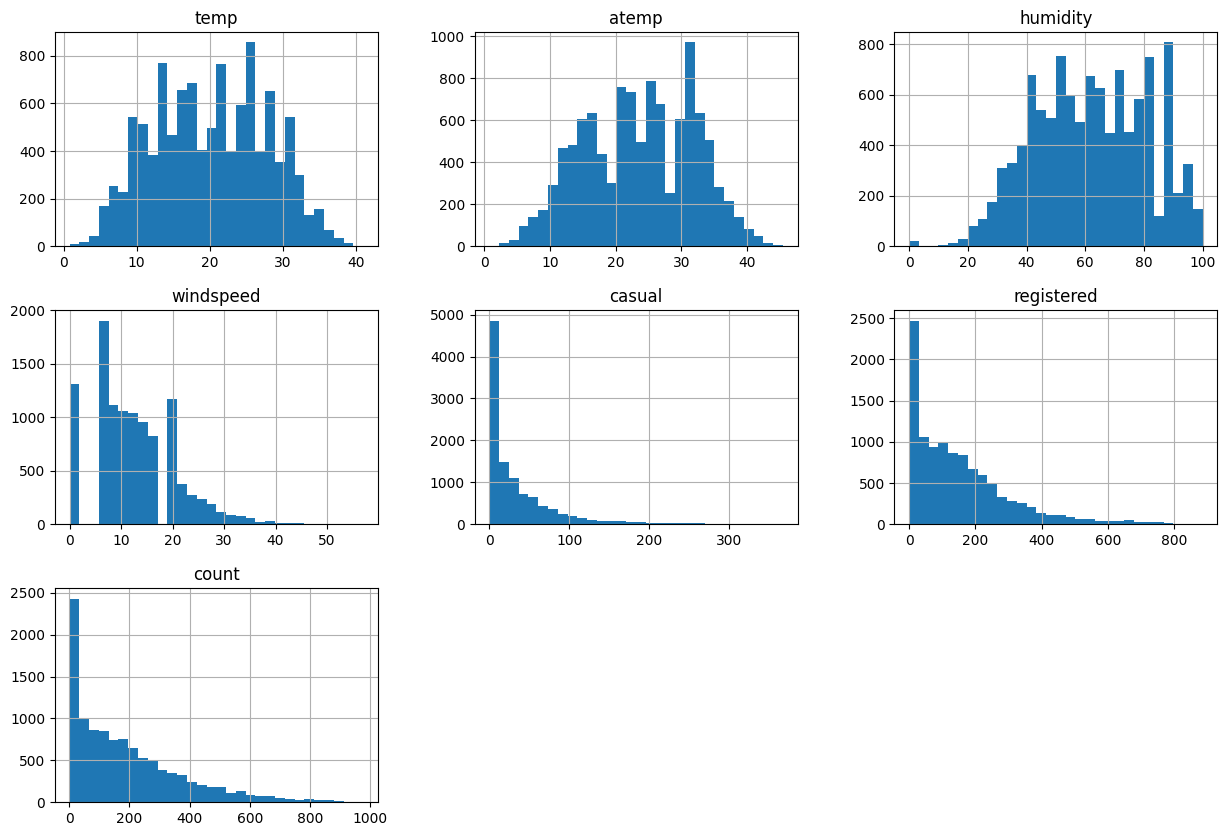

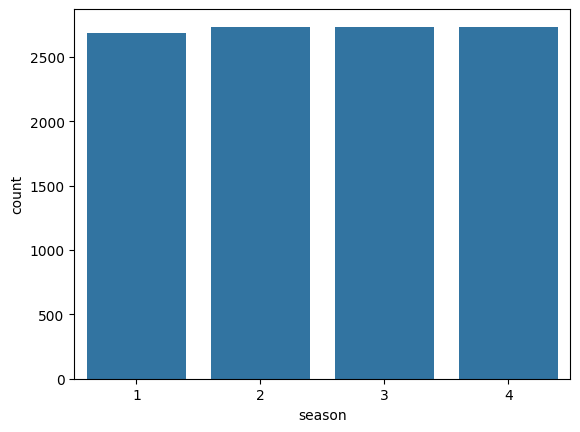

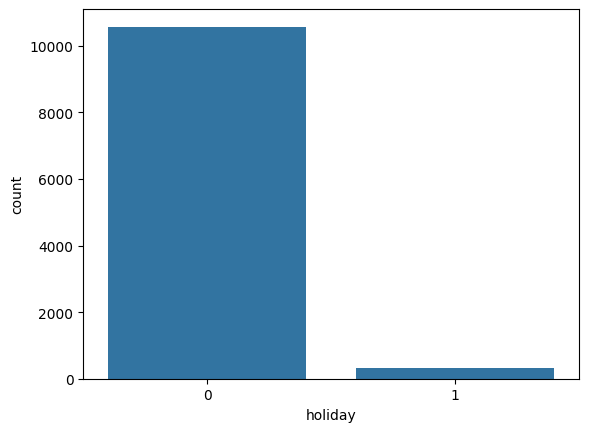

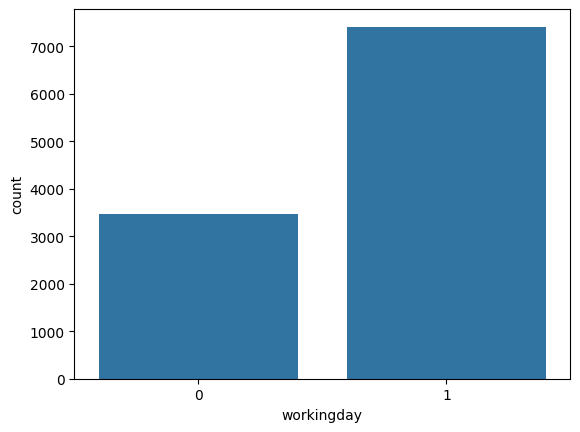

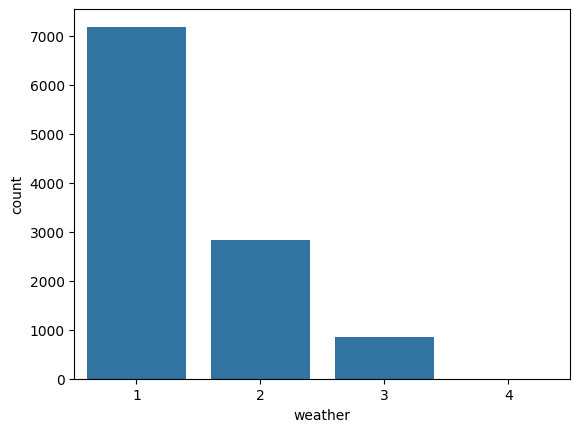

In [6]:
# Distribution of numerical variables
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()

# Distribution of categorical variables
categorical_features = ['season', 'holiday', 'workingday', 'weather']
for feature in categorical_features:
    sns.countplot(data=df, x=feature)
    plt.show()

    e. Check for Outliers and deal with them accordingly.

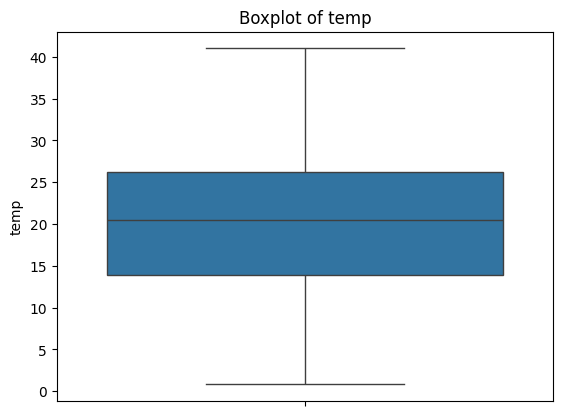

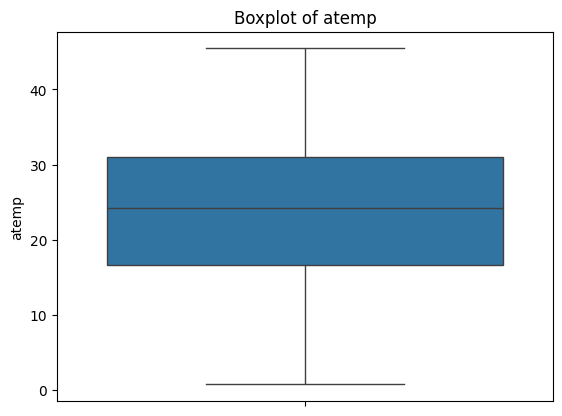

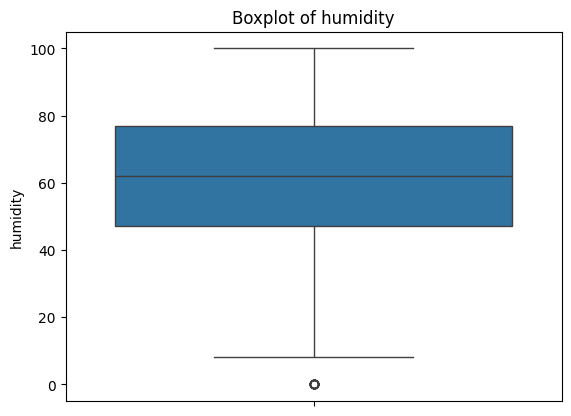

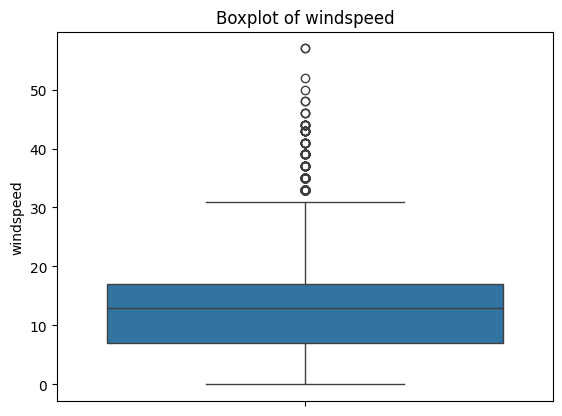

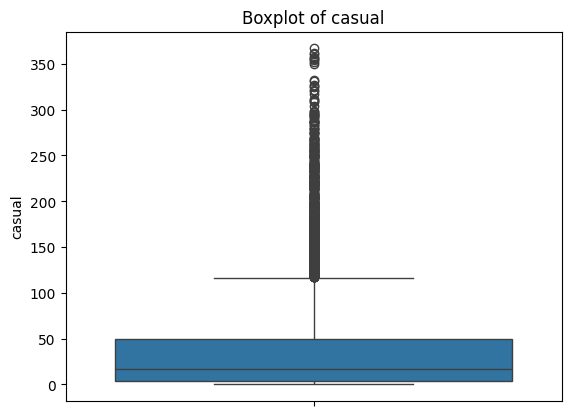

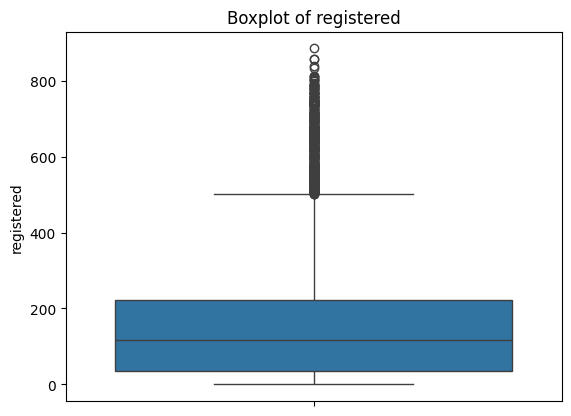

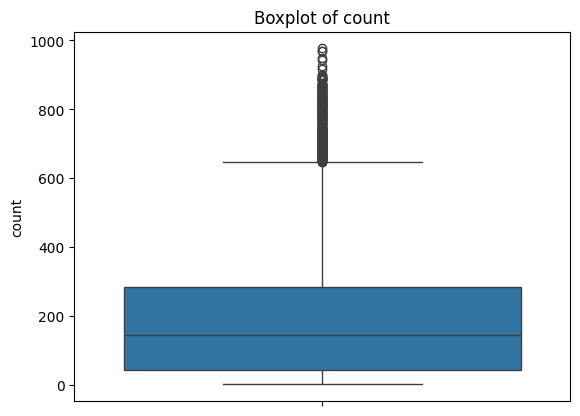

In [12]:
# Check for outliers using boxplots
for feature in numerical_features:
  sns.boxplot(data = df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

Shape of the dataset after removing outliers: (8779, 12)


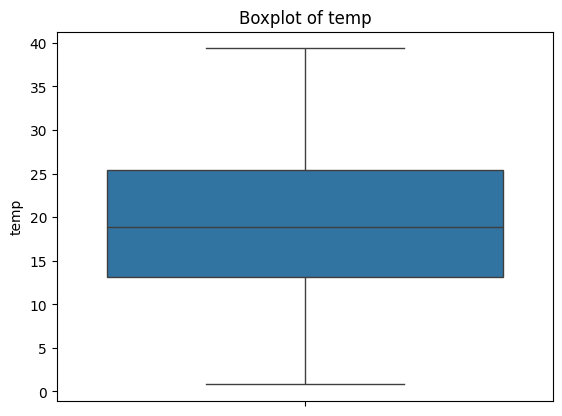

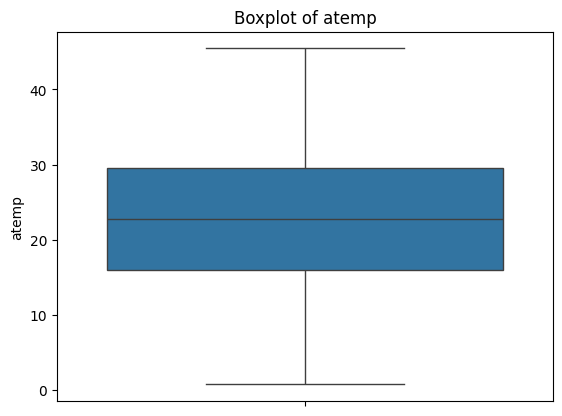

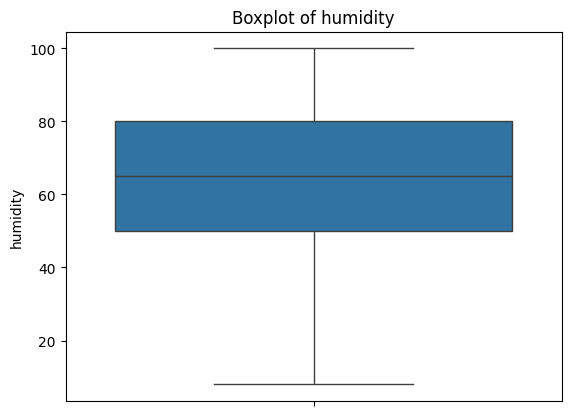

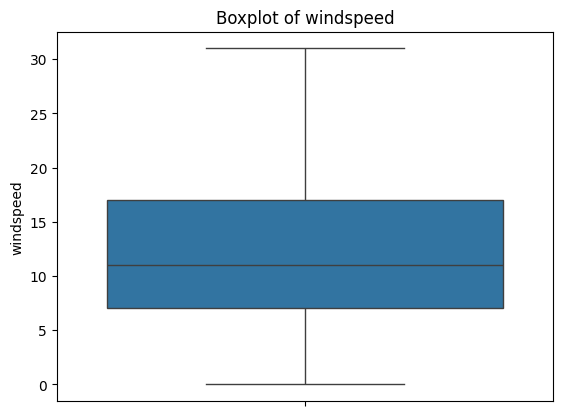

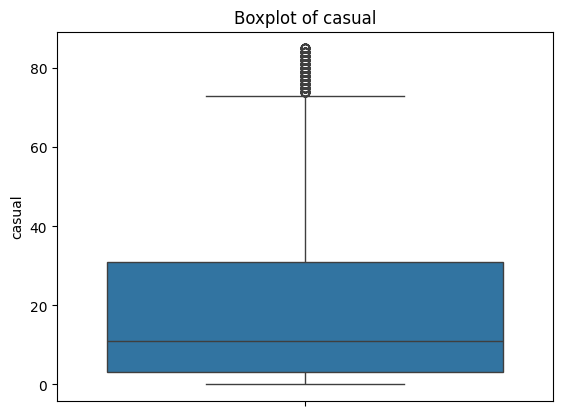

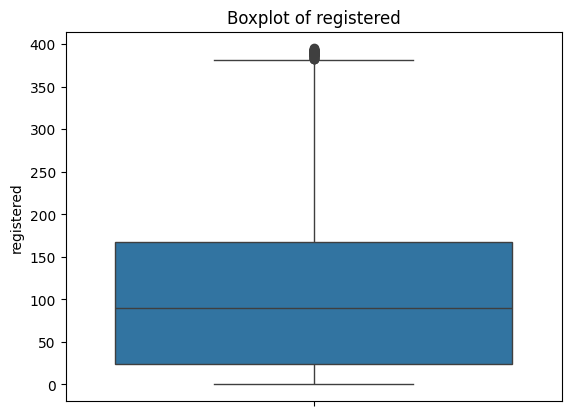

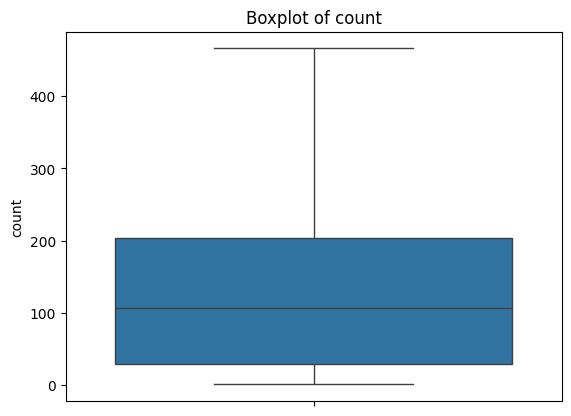

In [14]:
# Removing outliers using IQR method
for feature in numerical_features:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

print(f"Shape of the dataset after removing outliers: {df.shape}")

# After removing outliers using boxplots
for feature in numerical_features:
  sns.boxplot(data = df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

**2. Try establishing a Relationship between the Dependent and Independent Variables.**

temp           12.3000
atemp          13.6350
humidity       30.0000
windspeed       9.9964
casual         28.0000
registered    143.0000
count         175.0000
dtype: float64


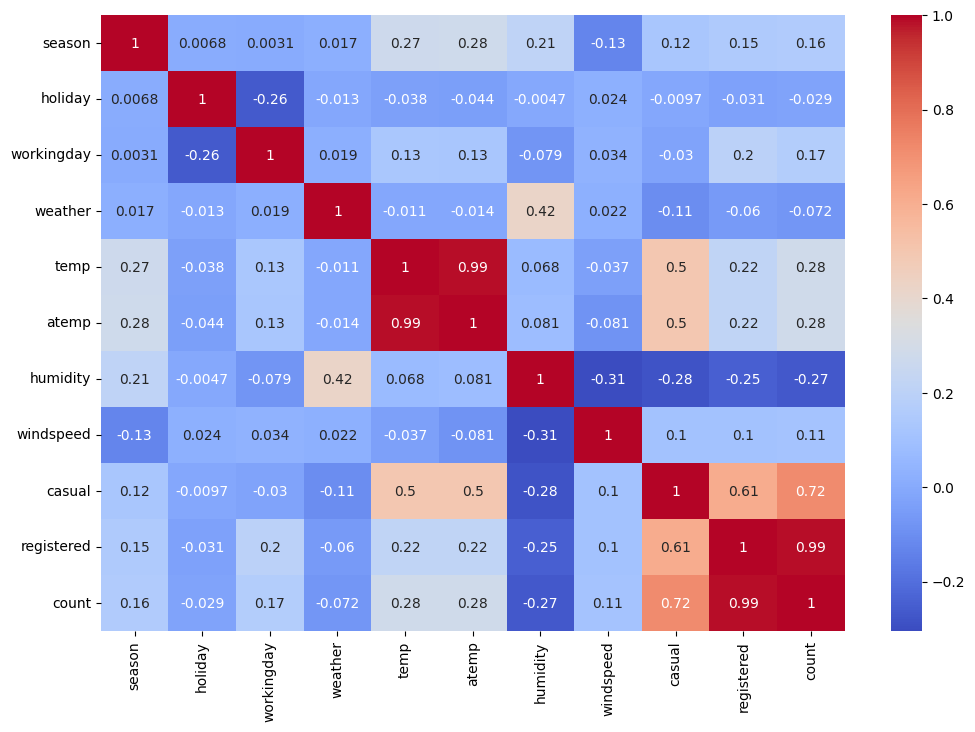

In [15]:
data_num=df[numerical_features]
data_num
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3-Q1
print(IQR)
data_iqr = df[~((data_num< (Q1-1.5*IQR))|(data_num > (Q3 + 1.5*IQR))).any(axis=1)]
data_iqr
# Plot a correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(data_iqr.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

**Insights:**

Feeling Temperature and Apparent Temperature: Feeling temperature and apparent temperature are highly correlated, as they usually have a very small difference between them. This suggests that the two variables are closely related and may provide redundant information in some cases.

Count, Causal, and Registered: The variables count, causal, and registered are all highly correlated with each other. This indicates a strong relationship between them, likely because they collectively contribute to the total bike rentals

In [68]:
# Drop the highly correlated columns from the DataFrame
data_iqr = data_iqr.drop(columns=['casual', 'registered', 'atemp'])

**3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

    a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

    b. Select an appropriate test -

    c. Set a significance level

    d. Calculate test Statistics / p-value

    e. Decide whether to accept or reject the Null Hypothesis.
    
    f. Draw inferences & conclusions from the analysis and provide recommendations.

**Null Hypothesis (H0):** No significant difference in bike rides between weekdays and weekends

**Alternative Hypothesis (H1):** Significant difference in bike rides between weekdays and weekends

T-statistic: -14.504561771203662, P-value: 3.9674280855098713e-47
Reject the null hypothesis: There is a significant difference between the number of bike rides on weekdays and weekends.


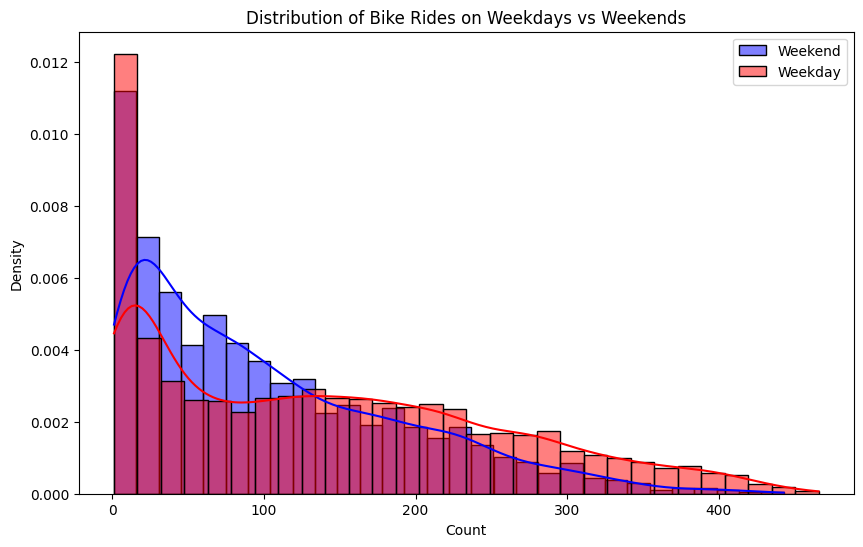

In [16]:
from scipy.stats import ttest_ind

# Create a new column for weekday/weekend
df['is_weekend'] = df['workingday'].apply(lambda x: 'Weekday' if x == 1 else 'Weekend')

# Perform T-test
weekend_data = df[df['is_weekend'] == 'Weekend']['count']
weekday_data = df[df['is_weekend'] == 'Weekday']['count']

t_stat, p_value = ttest_ind(weekend_data, weekday_data)

alpha = 0.05

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference between the number of bike rides on weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the number of bike rides on weekdays and weekends.")

plt.figure(figsize=(10, 6))
sns.histplot(weekend_data, color='blue', label='Weekend', kde=True, stat='density', bins=30)
sns.histplot(weekday_data, color='red', label='Weekday', kde=True, stat='density', bins=30)
plt.legend()
plt.title('Distribution of Bike Rides on Weekdays vs Weekends')
plt.xlabel('Count')
plt.ylabel('Density')
plt.show()


**Insights:**

1. The p-value obtained from the t-test indicates whether there is a statistically significant difference in the number of bike rides between weekdays and weekends.

2. The visual distribution plot helps to understand how bike rides vary between weekdays and weekends.


**4. Check if the demand of bicycles on rent is the same for different Weather
conditions.**

a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

b. Select an appropriate test

c. Check assumptions of the test

d. Set a significance level and Calculate the test Statistics / p-value.

e. Decide whether to accept or reject the Null Hypothesis.

f. Draw inferences & conclusions from the analysis and provide recommendations.

**Null Hypothesis (H0)**: The mean demand for bicycles is the same across all weather conditions.

**Alternate Hypothesis (H1):** The mean demand for bicycles is not the same across all weather conditions.


**One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

The samples are independent.

Each sample is from a normally distributed population.

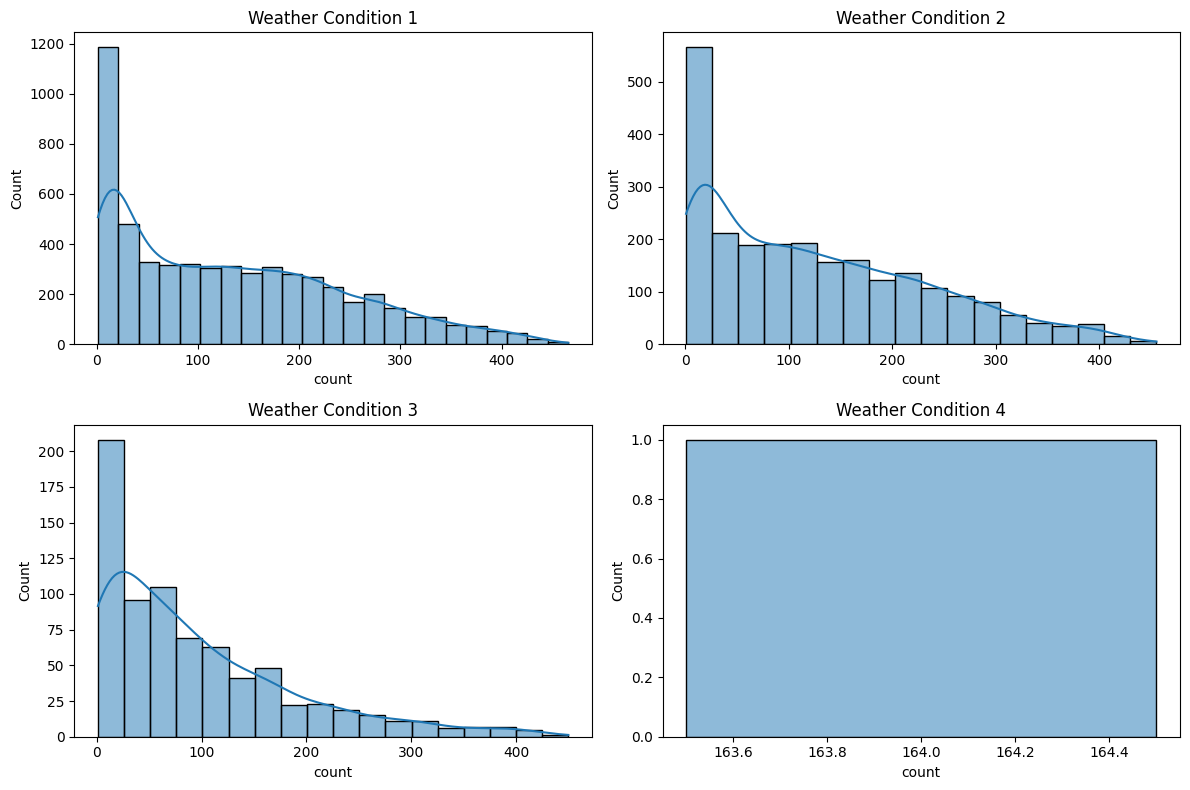

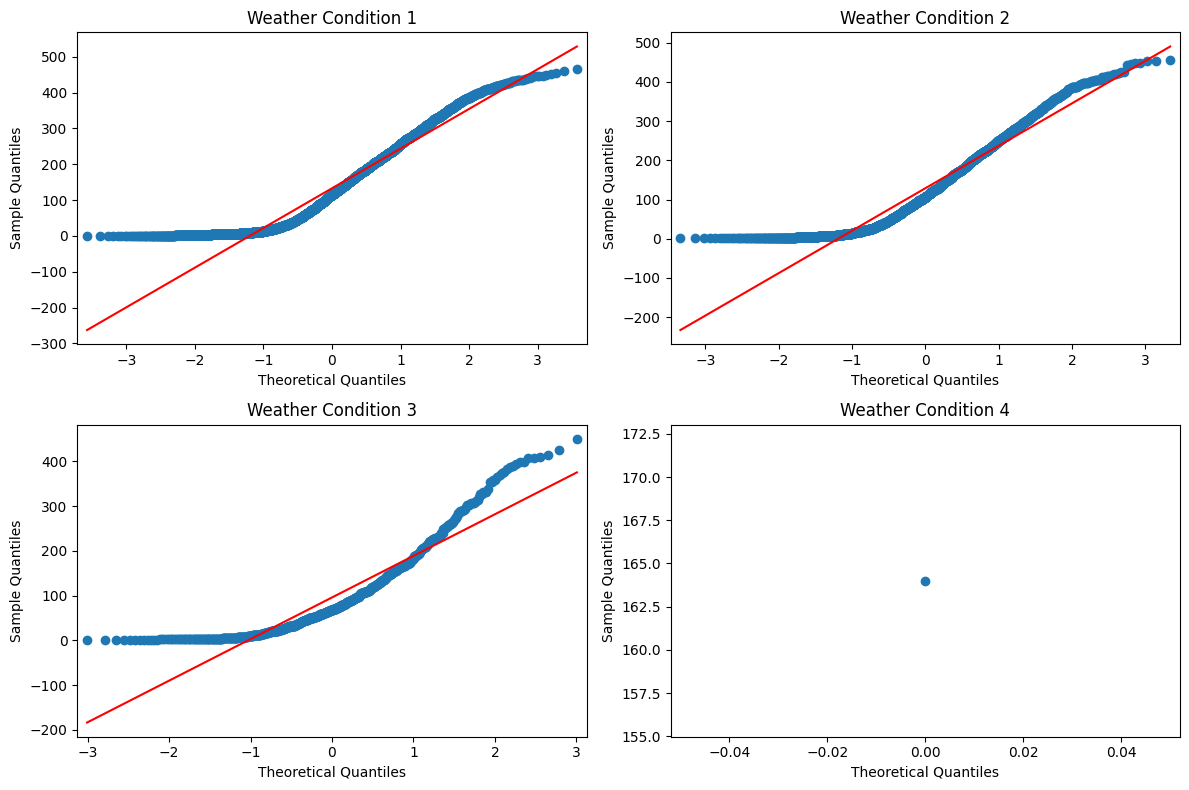

Levene’s Test for Equality of Variances: Stat=29.345293910282738, P-value=7.169679182904549e-19
Reject Null Hypothesis
Variance of the groups are not equal


In [23]:
from scipy.stats import kruskal, skew, kurtosis, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Checking the assumptions:

#Histograms for normality:
plt.figure(figsize=(12, 8))
for i, weather_type in enumerate(df['weather'].unique(), 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[df['weather'] == weather_type]['count'], kde=True)
    plt.title(f'Weather Condition {weather_type}')
plt.tight_layout()
plt.show()

#Q-Q Plots for normality:
plt.figure(figsize=(12, 8))
for i, weather_type in enumerate(df['weather'].unique(), 1):
    plt.subplot(2, 2, i)
    sm.qqplot(df[df['weather'] == weather_type]['count'], line='s', ax=plt.gca())
    plt.title(f'Weather Condition {weather_type}')
plt.tight_layout()
plt.show()

#Levene’s test for equality of variances:
stat, p_value = levene(df[df['weather'] == 1]['count'],
                       df[df['weather'] == 2]['count'],
                       df[df['weather'] == 3]['count'],
                       df[df['weather'] == 4]['count'])
print(f'Levene’s Test for Equality of Variances: Stat={stat}, P-value={p_value}')
if p_value<0.05:
  print('Reject Null Hypothesis')
  print('Variance of the groups are not equal')
else:
  print('Fail to reject Null Hypothesis')
  print('Variance of the groups are equal')


From the above plot,

We can see that points deviate from the straight line.

This means that the groups w1,w2,w3 does not follow a Normal Distribution.

Since the feature count does not match the assumptions required for **ANOVA**,we need to use non-parametric alternative. One such alternative is **Kruskal-Walis test**, which is non-parametric version of ANOVA and is suitable for comparing groups when the assumptions of ANOVA are not met.

In [21]:
#Perform Kruskal-Wallis H-test
stat, p_value = kruskal(df[df['weather'] == 1]['count'],
                        df[df['weather'] == 2]['count'],
                        df[df['weather'] == 3]['count'],
                        df[df['weather'] == 4]['count'])
print(f'Kruskal-Wallis Test: Stat={stat}, P-value={p_value}')

#Set a significance level
alpha = 0.05

# Decide whether to accept or reject the Null Hypothesis
if p_value <= alpha:
    print("Reject the Null Hypothesis: There is a significant difference in demand across different weather conditions.")
else:
    print("Fail to reject the Null Hypothesis: There is no significant difference in demand across different weather conditions.")

Kruskal-Wallis Test: Stat=71.909431822703, P-value=1.664625418274937e-15
Reject the Null Hypothesis: There is a significant difference in demand across different weather conditions.


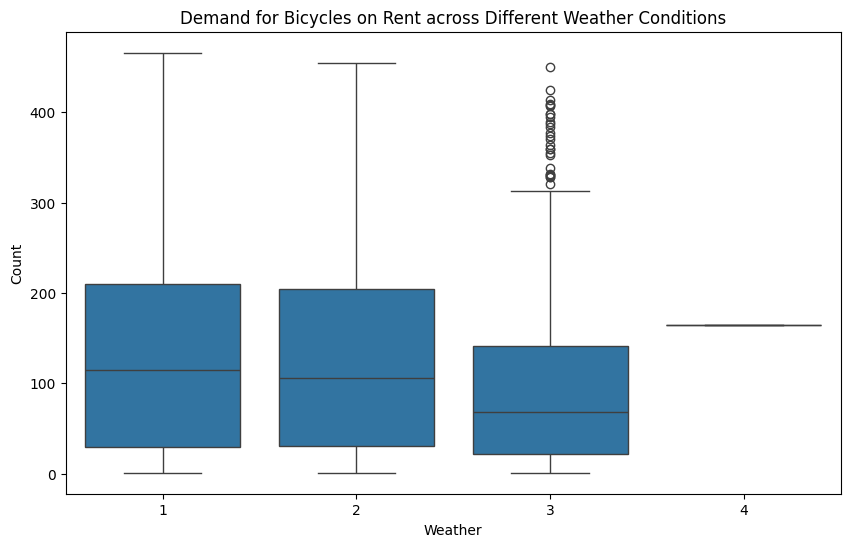

In [22]:
#f. Plotting the boxplot for visual understanding
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=df)
plt.title('Demand for Bicycles on Rent across Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

**Insights:**

1. The results from the **Kruskal-Wallis H-test** show a significant difference in demand for bicycles across different weather conditions. The assumptions were checked, and although normality was not met, the Kruskal-Wallis test does not require normality and is appropriate for this analysis.

2. The boxplot visually shows the distribution of bike counts across different weather conditions, highlighting the variations in demand.

**5. Check if the demand of bicycles on rent is the same for different Seasons**

    a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

    b. Select an appropriate test

    c. Check assumptions of the test

    d. Set a significance level and Calculate the test Statistics / p-value.

    e. Decide whether to accept or reject the Null Hypothesis.

    f. Draw inferences & conclusions from the analysis and provide recommendations.

**Null Hypothesis (H0):** There is no significant difference in the demand for bicycles on rent across different seasons.

**Alternative Hypothesis (H1):** There is a significant difference in the demand for bicycles on rent across different seasons.

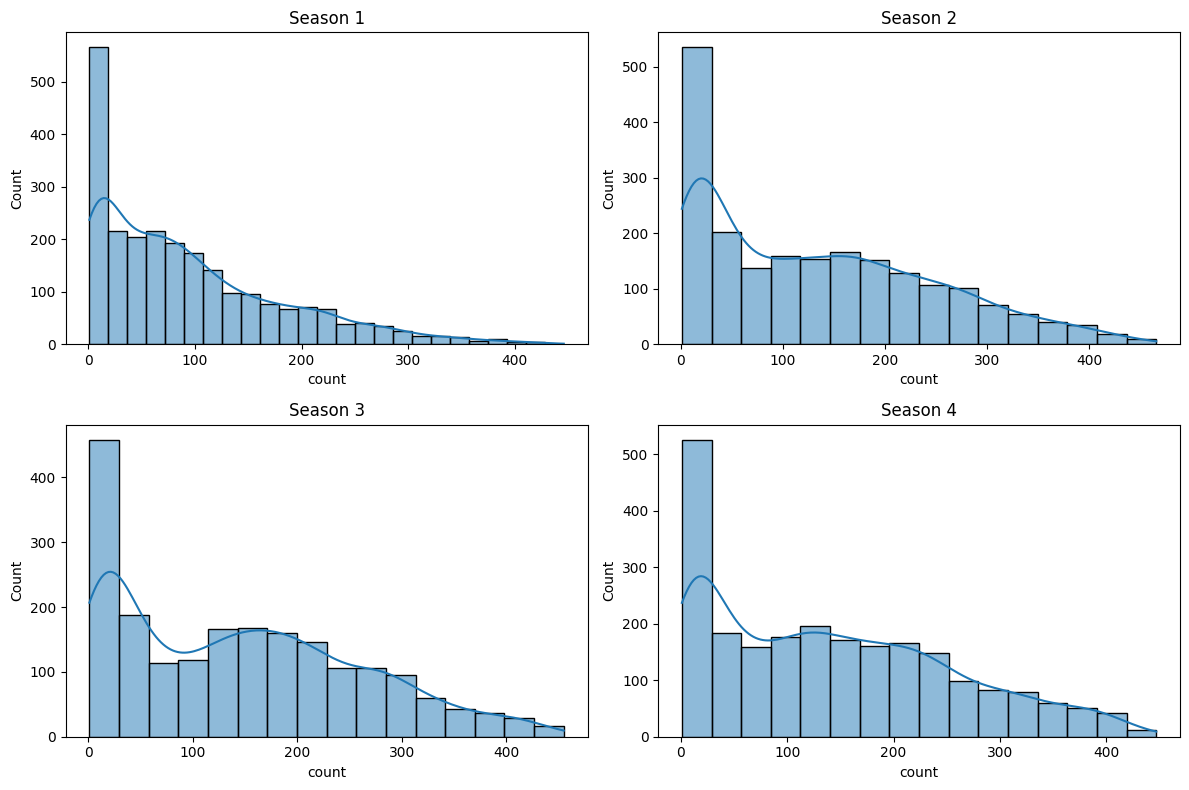

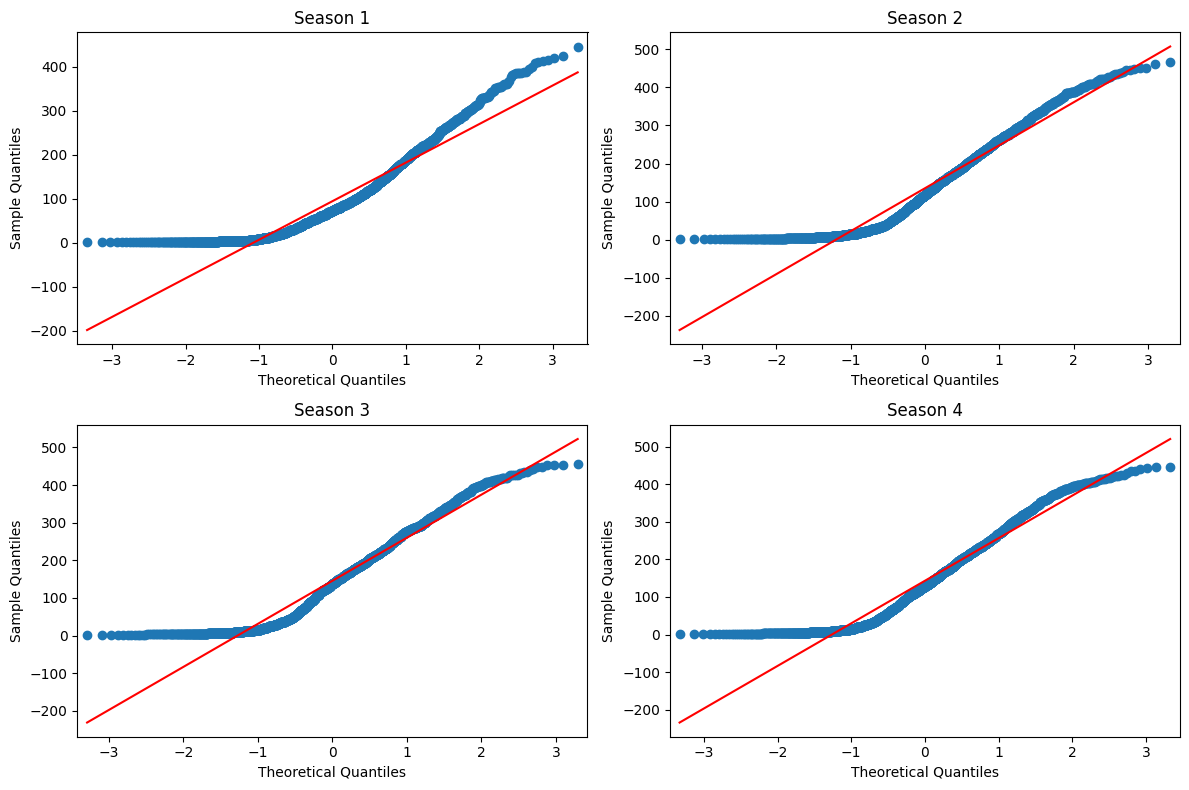

Season 1 - Shapiro-Wilk Test: Stat=0.8872350454330444, P-value=1.1427010240303117e-38
Season 2 - Shapiro-Wilk Test: Stat=0.9204025268554688, P-value=1.0102976628226983e-31
Season 3 - Shapiro-Wilk Test: Stat=0.9331875443458557, P-value=4.379658582621363e-29
Season 4 - Shapiro-Wilk Test: Stat=0.9325939416885376, P-value=4.237293671861072e-31
Levene’s Test for Equality of Variances: Stat=115.5753994131955, P-value=2.1066168093596592e-73
Reject Null Hypothesis
Variance of the groups are not equal


In [26]:
from scipy.stats import shapiro, levene, kruskal, skew, kurtosis, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Histograms for normality:
plt.figure(figsize=(12, 8))
for i, season in enumerate(df['season'].unique(), 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[df['season'] == season]['count'], kde=True)
    plt.title(f'Season {season}')
plt.tight_layout()
plt.show()

#Q-Q Plots for normality:
plt.figure(figsize=(12, 8))
for i, season in enumerate(df['season'].unique(), 1):
    plt.subplot(2, 2, i)
    sm.qqplot(df[df['season'] == season]['count'], line='s', ax=plt.gca())
    plt.title(f'Season {season}')
plt.tight_layout()
plt.show()

#Shapiro-Wilk’s test:
for season in df['season'].unique():
    counts = df[df['season'] == season]['count']
    stat, p_value = shapiro(counts)
    print(f'Season {season} - Shapiro-Wilk Test: Stat={stat}, P-value={p_value}')

#Levene’s test for equality of variances:
stat, p_value = levene(df[df['season'] == 1]['count'],
                       df[df['season'] == 2]['count'],
                       df[df['season'] == 3]['count'],
                       df[df['season'] == 4]['count'])
print(f'Levene’s Test for Equality of Variances: Stat={stat}, P-value={p_value}')
if p_value<0.05:
  print('Reject Null Hypothesis')
  print('Variance of the groups are not equal')
else:
  print('Fail to reject Null Hypothesis')
  print('Variance of the groups are equal')


From the above plot,

We can see that points deviate from the straight line.

This means that the season groups s1,s2,s3,s4 does not follow a Normal Distribution.

Kruskal-Wallis H-test: Stat=301.65284536466896, P-value=4.365593589218687e-65
Reject the Null Hypothesis: There is a significant difference in demand across different seasons.


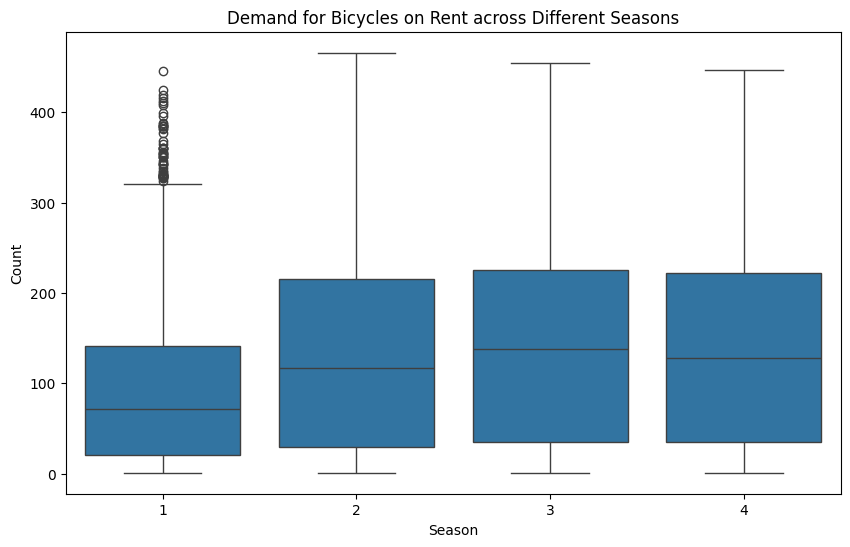

In [27]:
# Perform Kruskal-Wallis H-test
stat, p_value = kruskal(df[df['season'] == 1]['count'],
                            df[df['season'] == 2]['count'],
                            df[df['season'] == 3]['count'],
                            df[df['season'] == 4]['count'])
test_name = 'Kruskal-Wallis H-test'

print(f'{test_name}: Stat={stat}, P-value={p_value}')

# Set a significance level
alpha = 0.05

# Decide whether to accept or reject the Null Hypothesis
if p_value <= alpha:
    print("Reject the Null Hypothesis: There is a significant difference in demand across different seasons.")
else:
    print("Fail to reject the Null Hypothesis: There is no significant difference in demand across different seasons.")

# Plotting the boxplot for visual understanding
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=df)
plt.title('Demand for Bicycles on Rent across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


**Insights:**

The results from the **Kruskal-Wallis H-test** show a significant difference in demand for bicycles across different seasons.

The visualizations support the findings, providing a comprehensive understanding of how seasons affect bicycle demand.

**6. Check if the Weather conditions are significantly different during different Seasons?**

    a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

    b. Select an appropriate test

    c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns

    d. Set a significance level and Calculate the test Statistics / p-value.

    e. Decide whether to accept or reject the Null Hypothesis.

    f. Draw inferences & conclusions from the analysis and provide recommendations.

**Null Hypothesis (H0):** The weather conditions are not significantly different during different seasons.

**Alternative Hypothesis (H1):** The weather conditions are significantly different during different seasons.

In [28]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['season'], df['weather'])
contingency_table


weather,1,2,3,4
season,,,,
1,1533,676,183,1
2,1302,571,196,0
3,1394,444,169,0
4,1395,706,209,0


Both the variables are Categorical so **Chisquare test** is appropriate for Analysis

Chi-square Test: Chi2=51.586422621757805, P-value=5.4116788224005744e-08, DOF=9
Fail to reject the Null Hypothesis: The weather conditions are not significantly different during different seasons.


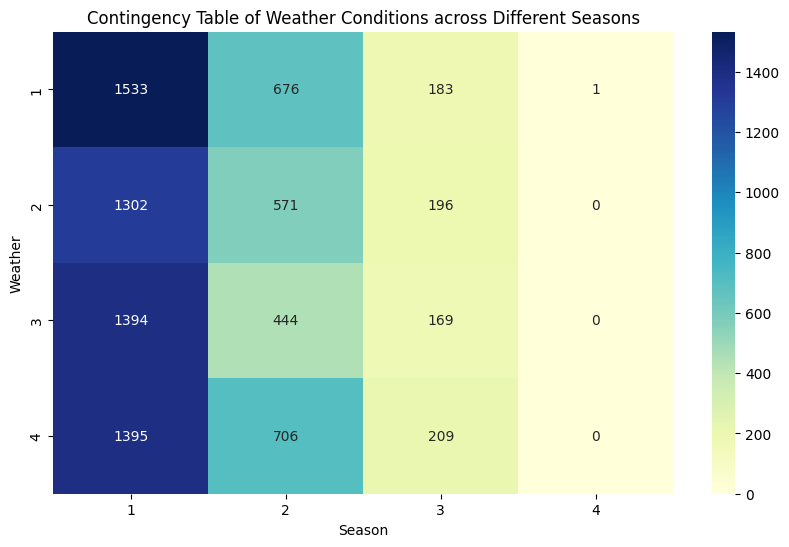

In [29]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square Test: Chi2={chi2}, P-value={p}, DOF={dof}')

alpha = 0.05

if alpha < p:
  print("Reject the Null Hypothesis: The weather conditions are significantly different during different seasons.")
else:
  print("Fail to reject the Null Hypothesis: The weather conditions are not significantly different during different seasons.")

#Visualizing the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Contingency Table of Weather Conditions across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Weather')
plt.show()

**Insights**

The results from the Chi-square test show a significant association between weather conditions and seasons. The visualizations support the findings, providing a comprehensive understanding of how weather conditions vary across different seasons.


**Recommendations**

Based on the analysis, the following recommendations are made to Yulu:

**Optimize Service During High Demand Periods:**

Weekdays vs. Weekends: As there is a significant difference in the number of bike rides between weekdays and weekends, Yulu should consider increasing the availability of bikes and operational staff during weekends to meet the higher demand.

Seasonal Demand: With significant seasonal variations in demand, Yulu can adjust their fleet size and promotional activities accordingly. For example, increase bike availability and marketing efforts during peak seasons (like spring and fall) and reduce during off-peak seasons (like winter).

**Weather-Based Demand Management:**

Weather Conditions: Since weather conditions significantly affect bike rental demand, Yulu can implement dynamic pricing strategies. Lower prices during adverse weather conditions (like heavy rain) to encourage usage and increase prices during favorable weather conditions.

Real-Time Weather Updates: Integrate real-time weather updates into the app to inform users about current weather conditions and offer weather-based promotions or discounts.

**User Engagement and Feedback:**

Collect and Analyze Feedback: Regularly collect feedback from users to understand their needs and preferences. Use this data to continuously improve the service.

Loyalty Programs: Implement loyalty programs to retain registered users and convert casual users into registered ones by offering rewards and benefits.

**Operational Efficiency:**

Fleet Management: Utilize data analytics to predict high-demand areas and times, optimizing the distribution and maintenance of the bike fleet. Ensure bikes are well-maintained and available where and when they are needed the most.


---



**Conclusion**

The analysis provides a comprehensive understanding of the factors influencing the demand for Yulu’s shared electric cycles in the Indian market.

Key insights are:

**Significant Variables:** Temperature, weather conditions, season, holiday, and working days are significant predictors of bike rental demand.

**Weekday vs. Weekend Demand:** There is a significant difference in bike rental demand between weekdays and weekends, with higher demand on weekends.

**Weather Conditions:** Demand for bicycles varies significantly across different weather conditions.

**Seasonal Variation:** There is a significant difference in bike rental demand across different seasons.

**Weather and Seasons:** Weather conditions differ significantly during different seasons, affecting bike rental demand.

By leveraging these insights, Yulu can make informed decisions to tailor their services, optimize operations, and implement strategic marketing initiatives to enhance user satisfaction and drive revenue growth. The recommendations provided aim to address the identified factors, ultimately helping Yulu to improve their service and regain profitability in the competitive micro-mobility market.



---





